In [1]:
# Import tools
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
import os
import sys
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt     #tsa为Time Series analysis缩写
import statsmodels.api as sm
import scipy.stats as scs
from arch import arch_model
import matplotlib as mpl


In [2]:
df = pd.read_csv(r"/Users/songchu/Desktop/data.csv",sep=',')

In [3]:
df.index = df['Date']
print(df.head())
df.head()

                  Date  Coal  Copper  Crude Oil WTI  Ethanol  Gasoline RBOB  \
Date                                                                          
2000-01-03  2000-01-03   NaN     NaN            NaN      NaN            NaN   
2000-01-04  2000-01-04   NaN   0.838          25.55      NaN            NaN   
2000-01-05  2000-01-05   NaN   0.848          24.91      NaN            NaN   
2000-01-06  2000-01-06   NaN   0.845          24.78      NaN            NaN   
2000-01-07  2000-01-07   NaN   0.846          24.22      NaN            NaN   

              Gold  Lean Hogs  Live Cattle  Natural Gas Platinum  Silver  \
Date                                                                       
2000-01-03     NaN      55.98          NaN          NaN      NaN     NaN   
2000-01-04  282.70      55.62          NaN        2.176      NaN     NaN   
2000-01-05  281.10      55.08          NaN        2.168      NaN     NaN   
2000-01-06  281.40      55.17          NaN        2.196      NaN  

,Date,Coal,Copper,Crude Oil WTI,Ethanol,Gasoline RBOB,Gold,Lean Hogs,Live Cattle,Natural Gas,Platinum,Silver,US Corn,US Soybean Meal,US Soybean Oil,US Soybeans,US Wheat
Date,,,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,55.98,NaN,NaN,NaN,NaN,NaN,146.4,NaN,NaN,NaN
2000-01-04,2000-01-04,NaN,0.838,25.55,NaN,NaN,282.70,55.62,NaN,2.176,NaN,NaN,NaN,147.9,NaN,NaN,NaN
2000-01-05,2000-01-05,NaN,0.848,24.91,NaN,NaN,281.10,55.08,NaN,2.168,NaN,NaN,NaN,150.7,NaN,NaN,NaN
2000-01-06,2000-01-06,NaN,0.845,24.78,NaN,NaN,281.40,55.17,NaN,2.196,NaN,NaN,NaN,149.1,NaN,NaN,NaN
2000-01-07,2000-01-07,NaN,0.846,24.22,NaN,NaN,281.90,55.62,NaN,2.173,NaN,NaN,NaN,149.1,NaN,NaN,NaN


In [4]:
Coal = df[['Coal']]
Coal = pd.DataFrame(Coal) 
Coal = Coal[np.isnan(df['Coal']) == False]
Coal.head()

,Coal
Date,
2011-02-22,71.00
2011-02-23,71.00
2011-02-24,70.25
2011-02-25,69.90
2011-02-28,70.35


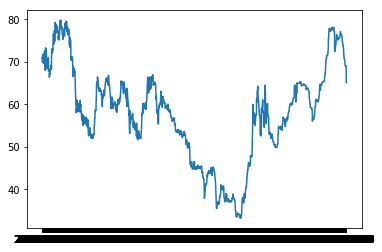

In [5]:
plt.plot(Coal)
plt.show()

In [6]:
# Autocorrelation Test
[lbvalue, pvalue] = acorr_ljungbox(Coal, lags = 10)
print('Ljung-Box Statistics: ', lbvalue[9])
print('p-value: ', pvalue[9])

Ljung-Box Statistics:  20167.129641395088
p-value:  0.0


In [7]:
# ARCH Test
[lbvalue, pvalue] = acorr_ljungbox(Coal**2, lags = 10)
print('Ljung-Box Statistics: ', lbvalue[9])
print('p-value: ', pvalue[9])

Ljung-Box Statistics:  20109.800507995547
p-value:  0.0


In [8]:
def _get_best_model(TS):
    best_aic = np.inf 
    best_order = None
    best_mdl = None

    pq_rng = range(5) 
    d_rng = range(5) 
    for i in pq_rng:
        for d in d_rng:
                try:
                    tmp_mdl = arch_model(y=Coal, p=i, q=d, dist='Normal').fit()
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, d)
                        best_mdl = tmp_mdl
                except: continue
    print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))                    
    return best_aic, best_order, best_mdl


In [9]:
# Notice I've selected a specific time period to run this analysis
TS =Coal.loc[:,['Coal']]
res_tup= _get_best_model(TS)


Iteration:      1,   Func. Count:      5,   Neg. LLF: 7515.152109394223
Iteration:      2,   Func. Count:     12,   Neg. LLF: 7369.557159289639
Iteration:      3,   Func. Count:     18,   Neg. LLF: 7298.934502245816
Iteration:      4,   Func. Count:     24,   Neg. LLF: 7221.856491393844
Iteration:      5,   Func. Count:     30,   Neg. LLF: 7100.856526650201
Iteration:      6,   Func. Count:     36,   Neg. LLF: 7077.95591680653
Iteration:      7,   Func. Count:     42,   Neg. LLF: 7046.237009409657
Iteration:      8,   Func. Count:     48,   Neg. LLF: 7015.195266700137
Iteration:      9,   Func. Count:     54,   Neg. LLF: 6985.937519462337
Iteration:     10,   Func. Count:     60,   Neg. LLF: 6958.4575332252325
Iteration:     11,   Func. Count:     66,   Neg. LLF: 6932.378509500953
Iteration:     12,   Func. Count:     72,   Neg. LLF: 6919.319881054797
Iteration:     13,   Func. Count:     78,   Neg. LLF: 6886.40284158978
Iteration:     14,   Func. Count:     84,   Neg. LLF: 6855.835469

Iteration:     25,   Func. Count:    174,   Neg. LLF: 6596.532586398251
Iteration:     26,   Func. Count:    181,   Neg. LLF: 6590.31749795403
Iteration:     27,   Func. Count:    188,   Neg. LLF: 6584.449444795759
Iteration:     28,   Func. Count:    195,   Neg. LLF: 6579.984908203101
Iteration:     29,   Func. Count:    202,   Neg. LLF: 6575.7731775268885
Iteration:     30,   Func. Count:    209,   Neg. LLF: 6572.760301067649
Iteration:     31,   Func. Count:    216,   Neg. LLF: 6565.557469591477
Iteration:     32,   Func. Count:    223,   Neg. LLF: 6564.9979271283955
Iteration:     33,   Func. Count:    231,   Neg. LLF: 6564.819193012607
Iteration:     34,   Func. Count:    237,   Neg. LLF: 6564.4659226985
Iteration:     35,   Func. Count:    243,   Neg. LLF: 6564.42322316491
Iteration:     36,   Func. Count:    249,   Neg. LLF: 6564.422644419124
Iteration:     37,   Func. Count:    255,   Neg. LLF: 6564.422388579156
Iteration:     38,   Func. Count:    261,   Neg. LLF: 6564.4223781

Iteration:      1,   Func. Count:      8,   Neg. LLF: 6950.365131556788
Iteration:      2,   Func. Count:     17,   Neg. LLF: 6926.342686835607
Iteration:      3,   Func. Count:     26,   Neg. LLF: 6843.16439787558
Iteration:      4,   Func. Count:     37,   Neg. LLF: 6788.172678572387
Iteration:      5,   Func. Count:     46,   Neg. LLF: 6761.909146506619
Iteration:      6,   Func. Count:     55,   Neg. LLF: 6712.684378668981
Iteration:      7,   Func. Count:     64,   Neg. LLF: 6662.044935833438
Iteration:      8,   Func. Count:     73,   Neg. LLF: 6642.083662859217
Iteration:      9,   Func. Count:     82,   Neg. LLF: 6617.969574356607
Iteration:     10,   Func. Count:     91,   Neg. LLF: 6604.231180795299
Iteration:     11,   Func. Count:    100,   Neg. LLF: 6593.568005996155
Iteration:     12,   Func. Count:    109,   Neg. LLF: 6586.681282168109
Iteration:     13,   Func. Count:    118,   Neg. LLF: 6581.5234913480745
Iteration:     14,   Func. Count:    127,   Neg. LLF: 6577.84420

Iteration:      9,   Func. Count:     91,   Neg. LLF: 6601.539030729889
Iteration:     10,   Func. Count:    101,   Neg. LLF: 6591.304129188934
Iteration:     11,   Func. Count:    111,   Neg. LLF: 6585.865939506286
Iteration:     12,   Func. Count:    121,   Neg. LLF: 6577.422488198232
Iteration:     13,   Func. Count:    130,   Neg. LLF: 6570.366777113013
Iteration:     14,   Func. Count:    140,   Neg. LLF: 6567.561688413629
Iteration:     15,   Func. Count:    150,   Neg. LLF: 6563.501512796927
Iteration:     16,   Func. Count:    160,   Neg. LLF: 6562.715730379207
Iteration:     17,   Func. Count:    170,   Neg. LLF: 6562.22279107061
Iteration:     18,   Func. Count:    179,   Neg. LLF: 6561.064390500006
Iteration:     19,   Func. Count:    189,   Neg. LLF: 6560.753564493122
Iteration:     20,   Func. Count:    199,   Neg. LLF: 6560.712924210277
Iteration:     21,   Func. Count:    208,   Neg. LLF: 6560.712473022436
Iteration:     22,   Func. Count:    217,   Neg. LLF: 6560.712377

In [10]:
model_Coal = arch_model(y=Coal, p=1, q=4, dist='Normal')
result_Coal = model_Coal.fit()
result_Coal.summary()

Iteration:      1,   Func. Count:      9,   Neg. LLF: 6987.876330239402
Iteration:      2,   Func. Count:     19,   Neg. LLF: 6941.415344631059
Iteration:      3,   Func. Count:     29,   Neg. LLF: 6828.019100292759
Iteration:      4,   Func. Count:     41,   Neg. LLF: 6790.277244945333
Iteration:      5,   Func. Count:     51,   Neg. LLF: 6762.719884643827
Iteration:      6,   Func. Count:     61,   Neg. LLF: 6708.742584098659
Iteration:      7,   Func. Count:     71,   Neg. LLF: 6661.054161705832
Iteration:      8,   Func. Count:     81,   Neg. LLF: 6615.120967078594
Iteration:      9,   Func. Count:     91,   Neg. LLF: 6600.497127779656
Iteration:     10,   Func. Count:    101,   Neg. LLF: 6592.051071008136
Iteration:     11,   Func. Count:    111,   Neg. LLF: 6584.810990526366
Iteration:     12,   Func. Count:    121,   Neg. LLF: 6568.866307071369
Iteration:     13,   Func. Count:    131,   Neg. LLF: 6565.3989530292365
Iteration:     14,   Func. Count:    141,   Neg. LLF: 6561.5470

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   Coal   R-squared:                      -0.029
Mean Model:             Constant Mean   Adj. R-squared:                 -0.029
Vol Model:                      GARCH   Log-Likelihood:               -6551.87
Distribution:                  Normal   AIC:                           13117.7
Method:            Maximum Likelihood   BIC:                           13157.2
                                        No. Observations:                 2071
Date:                Sun, Apr 28 2019   Df Residuals:                     2064
Time:                        20:46:23   Df Model:                            7
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            59.7570      0.159    375.447      0.000 [ 59.445, 60.069]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1587  9.625e-02      1.649  9.909e-02 [-2.990e-02,  0.347]
alpha[1]       0.8877      0.114      7.765  8.154e-15    [  0.664,  1.112]
beta[1]    4.4008e-03      0.334  1.317e-02      0.989    [ -0.650,  0.659]
beta[2]        0.0000      0.282      0.000      1.000    [ -0.552,  0.552]
beta[3]        0.0000      0.123      0.000      1.000    [ -0.241,  0.241]
beta[4]        0.1079  9.366e-02      1.152      0.249 [-7.566e-02,  0.291]
===========================================================================

Covariance estimator: robust
"""

In [12]:
result_Coal.params

mu          59.756978
omega        0.158742
alpha[1]     0.887693
beta[1]      0.004401
beta[2]      0.000000
beta[3]      0.000000
beta[4]      0.107906
Name: params, dtype: float64

In [13]:
# Extract the white noise term using the fitted model
df1_model = pd.DataFrame()
residuals = result_Coal.resid
df1_model['a_t'] = result_Coal.resid
sigma_t = [1]
for i in range(len(df1_model.index)-1):
    tmpSigma = sigma_t[i]
    tmpRes = residuals[i]
    sigma_t.append(np.sqrt(0.013959 + 0.014262*tmpRes**2 + 0.981363*tmpSigma**2))
    
df1_model['sigma_t'] = sigma_t
df1_model['white_noise'] = df1_model['a_t'] / df1_model['sigma_t']

In [14]:
# Test for the white noise series
[lbvalue, pvalue] = acorr_ljungbox(df1_model['white_noise'], lags = 10)
print('Ljung-Box Statistics: ', lbvalue[9])
print('p-value: ', pvalue[9])

Ljung-Box Statistics:  17522.033730793377
p-value:  0.0
